# SBCAS2020 - January - Hierarchical and Kmeans

# 1. Import

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from time import time
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.metrics import *
import seaborn as sns
sns.set()

In [ ]:
!pip install geopandas

     |████████████████████████████████| 931kB 3.5MB/s 
     |████████████████████████████████| 10.4MB 16.2MB/s 
     |████████████████████████████████| 14.7MB 44.6MB/s 


In [ ]:
import geopandas

In [ ]:
!pip install ipython-autotime

%load_ext autotime

  Created wheel for ipython-autotime: filename=ipython_autotime-0.1-cp36-none-any.whl size=1832 sha256=dcf768a1bbaea7020392cf5e81ba2cd752ebd813e764c1735c1f6d513297e8fb
  Stored in directory: /root/.cache/pip/wheels/d2/df/81/2db1e54bc91002cec40334629bc39cfa86dff540b304ebcd6e
Successfully built ipython-autotime


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving february-dataset.csv to february-dataset.csv
time: 7.6 s


## Read CSV

In [ ]:
df = pd.read_csv('january-dataset.csv', sep=',', index_col='location')

time: 23.3 ms


## Verify import

In [ ]:
df.head()

,totalcases,young,adult,older,prevalence,incidence,incidence7,deathrate,density,hdi
location,,,,,,,,,,
China,0.041215,0.18,0.71,0.11,0.037840,0.018956,0.010627,0.029617,148.348833,0.758
Japan,0.000791,0.13,0.60,0.28,0.000791,0.000000,0.000000,0.000000,347.073458,0.915
South Korea,0.001938,0.13,0.73,0.14,0.001938,0.000000,0.000000,0.000000,529.652100,0.906
Thailand,0.005764,0.17,0.71,0.12,0.005764,0.002882,0.001441,0.000000,135.897207,0.765
United States,0.000306,0.19,0.65,0.16,0.000306,0.000000,0.000000,0.000000,35.766089,0.920


time: 43.6 ms


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, China to United States
Data columns (total 10 columns):
totalcases    5 non-null float64
young         5 non-null float64
adult         5 non-null float64
older         5 non-null float64
prevalence    5 non-null float64
incidence     5 non-null float64
incidence7    5 non-null float64
deathrate     5 non-null float64
density       5 non-null float64
hdi           5 non-null float64
dtypes: float64(10)
memory usage: 440.0+ bytes
time: 9.89 ms


In [ ]:
df.describe()

,totalcases,young,adult,older,prevalence,incidence,incidence7,deathrate,density,hdi
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.010003,0.160000,0.680000,0.162000,0.009328,0.004368,0.002414,0.005923,239.347537,0.852800
std,0.017579,0.028284,0.053852,0.068702,0.016082,0.008250,0.004634,0.013245,197.680142,0.083533
min,0.000306,0.130000,0.600000,0.110000,0.000306,0.000000,0.000000,0.000000,35.766089,0.758000
25%,0.000791,0.130000,0.650000,0.120000,0.000791,0.000000,0.000000,0.000000,135.897207,0.765000
50%,0.001938,0.170000,0.710000,0.140000,0.001938,0.000000,0.000000,0.000000,148.348833,0.906000
75%,0.005764,0.180000,0.710000,0.160000,0.005764,0.002882,0.001441,0.000000,347.073458,0.915000
max,0.041215,0.190000,0.730000,0.280000,0.037840,0.018956,0.010627,0.029617,529.652100,0.920000


time: 58.6 ms


# 2. Dataprep

### Data analysis per features

In [ ]:
scaler = StandardScaler()

time: 1.55 ms


In [ ]:
data = df.copy()

time: 2.21 ms


In [ ]:
data.head()

,totalcases,young,adult,older,prevalence,incidence,incidence7,deathrate,density,hdi
location,,,,,,,,,,
China,0.041215,0.18,0.71,0.11,0.037840,0.018956,0.010627,0.029617,148.348833,0.758
Japan,0.000791,0.13,0.60,0.28,0.000791,0.000000,0.000000,0.000000,347.073458,0.915
South Korea,0.001938,0.13,0.73,0.14,0.001938,0.000000,0.000000,0.000000,529.652100,0.906
Thailand,0.005764,0.17,0.71,0.12,0.005764,0.002882,0.001441,0.000000,135.897207,0.765
United States,0.000306,0.19,0.65,0.16,0.000306,0.000000,0.000000,0.000000,35.766089,0.920


time: 30.6 ms


In [ ]:
col_names = ['totalcases','prevalence','incidence','incidence7','density','hdi']
features = data[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
data[col_names] = features

time: 9.18 ms


In [ ]:
data.head()

,totalcases,young,adult,older,prevalence,incidence,incidence7,deathrate,density,hdi
location,,,,,,,,,,
China,1.985105,0.18,0.71,0.11,1.982190,1.976989,1.981785,0.029617,-0.514668,-1.268841
Japan,-0.585885,0.13,0.60,0.28,-0.593497,-0.591883,-0.582366,0.000000,0.609273,0.832510
South Korea,-0.512905,0.13,0.73,0.14,-0.513725,-0.591883,-0.582366,0.000000,1.641897,0.712050
Thailand,-0.269591,0.17,0.71,0.12,-0.247762,-0.201342,-0.234686,0.000000,-0.585092,-1.175150
United States,-0.616724,0.19,0.65,0.16,-0.627206,-0.591883,-0.582366,0.000000,-1.151410,0.899432


time: 29.4 ms


# 3. Model building and implementation

## Dendrogram and cluster visualization (Full, PCA2, PCA3)

In [ ]:
hierarc_clustering_full = sch.linkage(data, method = 'ward')

time: 5.96 ms


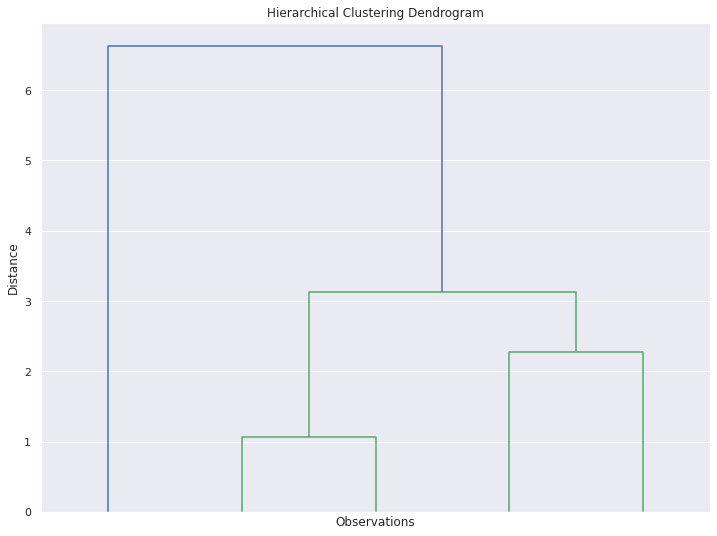

time: 227 ms


In [ ]:
plt.figure(figsize = (12,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
sch.dendrogram(hierarc_clustering_full, truncate_mode ='level', p=5, show_leaf_counts = False, no_labels = True)
plt.show()

In [ ]:
reduced_data2 = PCA(n_components=2).fit_transform(data)

time: 27 ms


In [ ]:
hierarc_clustering_pca2 = sch.linkage(reduced_data2, method = 'ward')

time: 2.12 ms


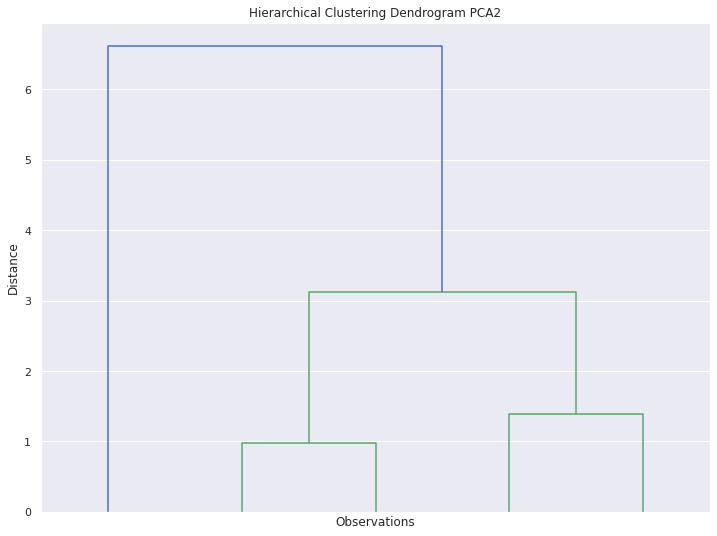

time: 199 ms


In [ ]:
plt.figure(figsize = (12,9))
plt.title('Hierarchical Clustering Dendrogram PCA2')
plt.xlabel('Observations')
plt.ylabel('Distance')
sch.dendrogram(hierarc_clustering_pca2, truncate_mode ='level', p=5, show_leaf_counts = False, no_labels = True)
plt.show()

In [ ]:
reduced_data3 = PCA(n_components=3).fit_transform(data)

time: 3.53 ms


In [ ]:
hierarc_clustering_pca3 = sch.linkage(reduced_data3, method = 'ward')

time: 1.88 ms


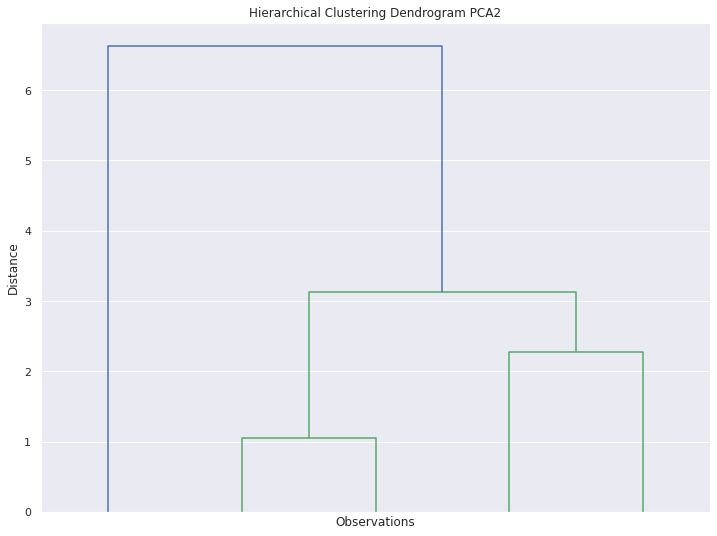

time: 201 ms


In [ ]:
plt.figure(figsize = (12,9))
plt.title('Hierarchical Clustering Dendrogram PCA2')
plt.xlabel('Observations')
plt.ylabel('Distance')
sch.dendrogram(hierarc_clustering_pca3, truncate_mode ='level', p=5, show_leaf_counts = False, no_labels = True)
plt.show()

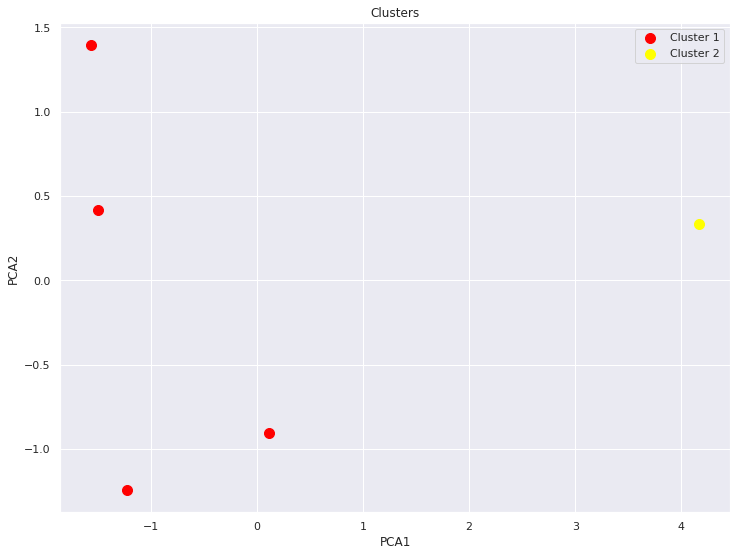

time: 364 ms


In [ ]:
#2 clusters
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(data)
plt.figure(figsize = (12,9))
plt.scatter(reduced_data2[y_hc == 0, 0], reduced_data2[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(reduced_data2[y_hc == 1, 0], reduced_data2[y_hc == 1, 1], s = 100, c = 'yellow', label = 'Cluster 2')
#plt.scatter(reduced_data2[y_hc == 2, 0], reduced_data2[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(reduced_data2[y_hc == 3, 0], reduced_data2[y_hc == 3, 1], s = 100, c = 'purple', label = 'Cluster 3')
#plt.scatter(reduced_data2[y_hc == 4, 0], reduced_data2[y_hc == 4, 1], s = 100, c = 'cyan', label = 'Cluster 3')
plt.title('Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

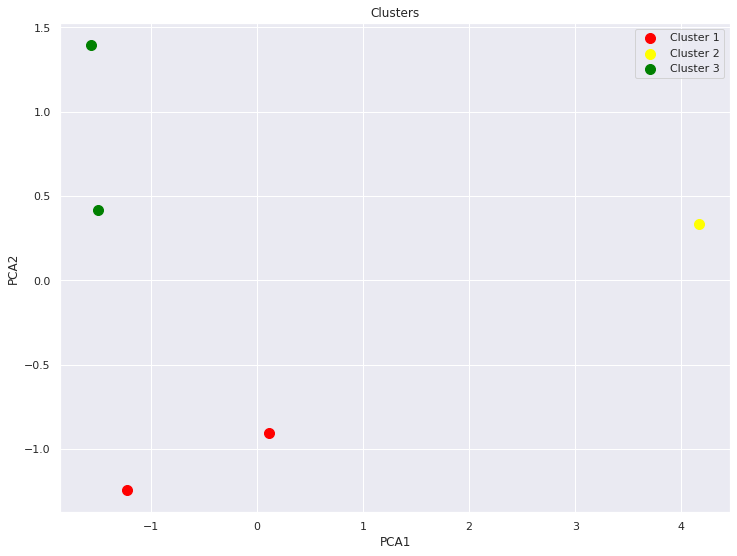

time: 405 ms


In [ ]:
#3 clusters
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(data)
plt.figure(figsize = (12,9))
plt.scatter(reduced_data2[y_hc == 0, 0], reduced_data2[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(reduced_data2[y_hc == 1, 0], reduced_data2[y_hc == 1, 1], s = 100, c = 'yellow', label = 'Cluster 2')
plt.scatter(reduced_data2[y_hc == 2, 0], reduced_data2[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(reduced_data2[y_hc == 3, 0], reduced_data2[y_hc == 3, 1], s = 100, c = 'purple', label = 'Cluster 3')
#plt.scatter(reduced_data2[y_hc == 4, 0], reduced_data2[y_hc == 4, 1], s = 100, c = 'cyan', label = 'Cluster 3')
plt.title('Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

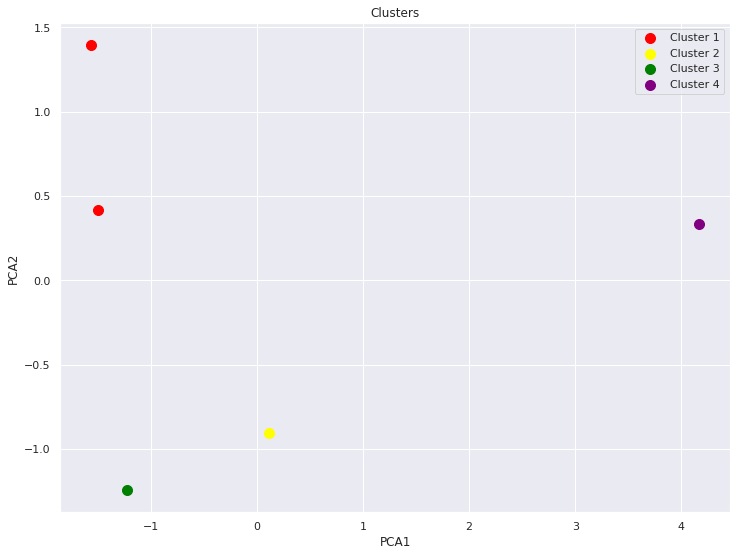

time: 382 ms


In [ ]:
#4 clusters
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(data)
plt.figure(figsize = (12,9))
plt.scatter(reduced_data2[y_hc == 0, 0], reduced_data2[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(reduced_data2[y_hc == 1, 0], reduced_data2[y_hc == 1, 1], s = 100, c = 'yellow', label = 'Cluster 2')
plt.scatter(reduced_data2[y_hc == 2, 0], reduced_data2[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(reduced_data2[y_hc == 3, 0], reduced_data2[y_hc == 3, 1], s = 100, c = 'purple', label = 'Cluster 4')
#plt.scatter(reduced_data2[y_hc == 4, 0], reduced_data2[y_hc == 4, 1], s = 100, c = 'cyan', label = 'Cluster 3')
plt.title('Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

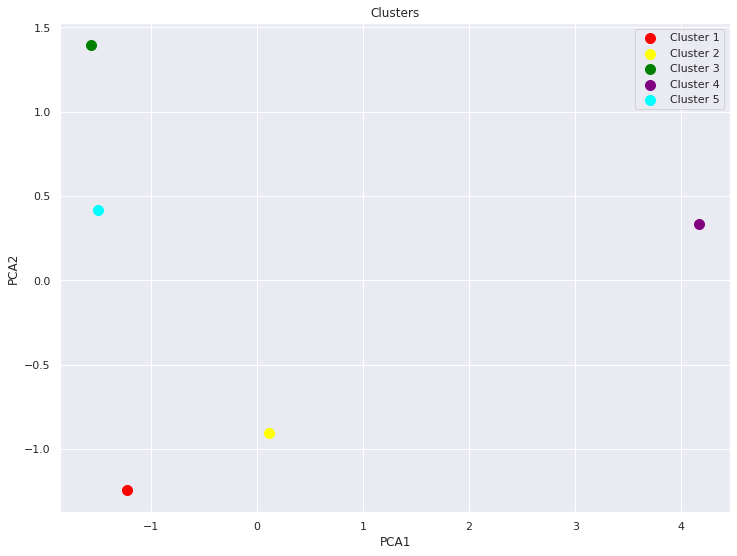

time: 388 ms


In [ ]:
#5 clusters
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(data)
plt.figure(figsize = (12,9))
plt.scatter(reduced_data2[y_hc == 0, 0], reduced_data2[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(reduced_data2[y_hc == 1, 0], reduced_data2[y_hc == 1, 1], s = 100, c = 'yellow', label = 'Cluster 2')
plt.scatter(reduced_data2[y_hc == 2, 0], reduced_data2[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(reduced_data2[y_hc == 3, 0], reduced_data2[y_hc == 3, 1], s = 100, c = 'purple', label = 'Cluster 4')
plt.scatter(reduced_data2[y_hc == 4, 0], reduced_data2[y_hc == 4, 1], s = 100, c = 'cyan', label = 'Cluster 5')
plt.title('Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

### Kmeans

#### Elbow method dataset no standardization

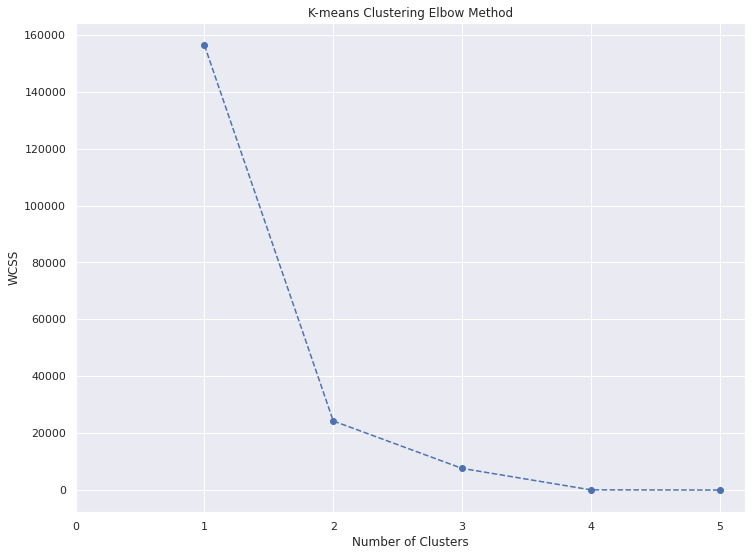

time: 316 ms


In [ ]:
wcss =[]
for i in range(1,6):
  kmeanModel = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeanModel.fit(df)
  wcss.append(kmeanModel.inertia_)
plt.figure(figsize=(12,9))
plt.plot(range(1,6),wcss,marker='o',linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(0, 6, 1))
plt.title('K-means Clustering Elbow Method')
plt.show()

#### Elbow method dataset standardized

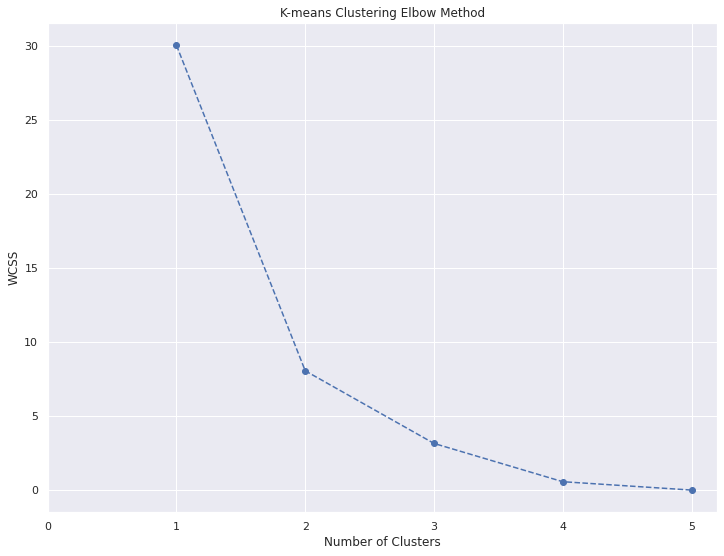

time: 304 ms


In [ ]:
wcss =[]
for i in range(1,6):
  kmeanModel = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeanModel.fit(data)
  wcss.append(kmeanModel.inertia_)
plt.figure(figsize=(12,9))
plt.plot(range(1,6),wcss,marker='o',linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(0, 6, 1))
plt.title('K-means Clustering Elbow Method')
plt.show()

#### Elbow method dataset PCA2

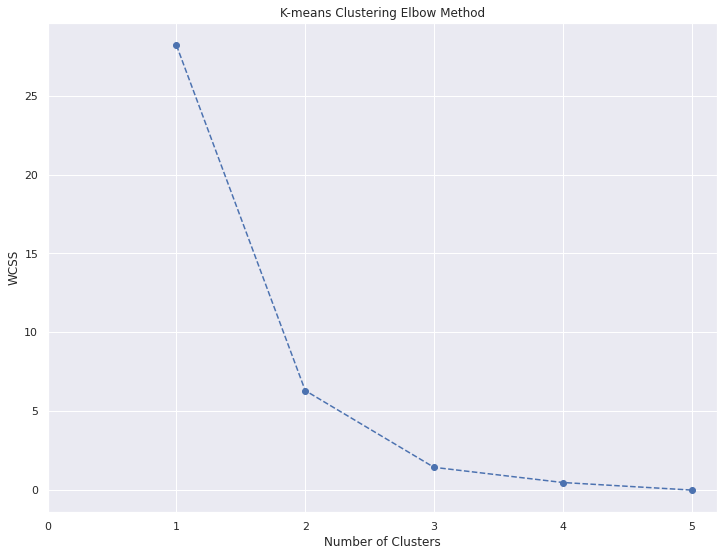

time: 307 ms


In [ ]:
wcss =[]
for i in range(1,6):
  kmeanModel = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeanModel.fit(reduced_data2)
  wcss.append(kmeanModel.inertia_)
plt.figure(figsize=(12,9))
plt.plot(range(1,6),wcss,marker='o',linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(0, 6, 1))
plt.title('K-means Clustering Elbow Method')
plt.show()

#### Elbow method dataset PCA3

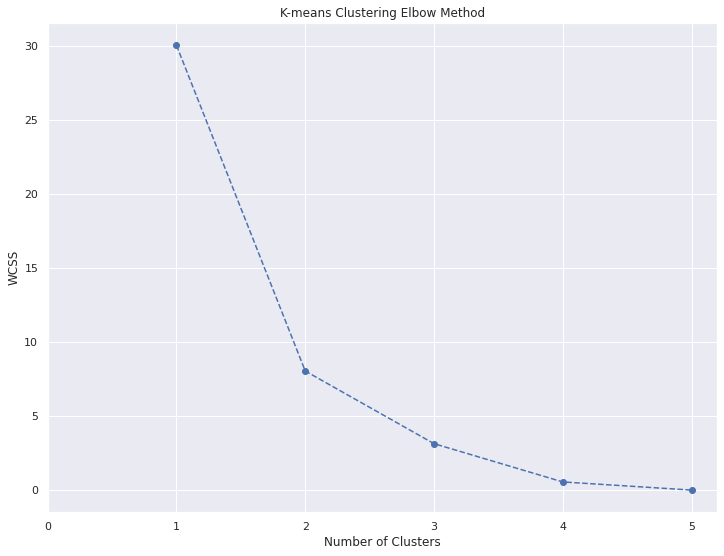

time: 310 ms


In [ ]:
wcss =[]
for i in range(1,6):
  kmeanModel = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeanModel.fit(reduced_data3)
  wcss.append(kmeanModel.inertia_)
plt.figure(figsize=(12,9))
plt.plot(range(1,6),wcss,marker='o',linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(0, 6, 1))
plt.title('K-means Clustering Elbow Method')
plt.show()

### Drawing the clusters with kmeans

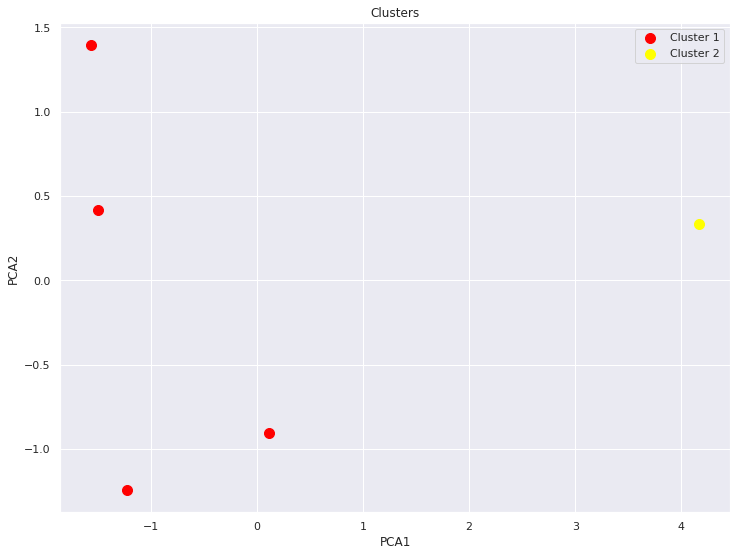

time: 479 ms


In [ ]:
#2 clusters
hc = KMeans(n_clusters = 2, random_state=42)
y_hc = hc.fit_predict(data)
plt.figure(figsize = (12,9))
plt.scatter(reduced_data2[y_hc == 0, 0], reduced_data2[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(reduced_data2[y_hc == 1, 0], reduced_data2[y_hc == 1, 1], s = 100, c = 'yellow', label = 'Cluster 2')
#plt.scatter(reduced_data2[y_hc == 2, 0], reduced_data2[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(reduced_data2[y_hc == 3, 0], reduced_data2[y_hc == 3, 1], s = 100, c = 'purple', label = 'Cluster 3')
#plt.scatter(reduced_data2[y_hc == 4, 0], reduced_data2[y_hc == 4, 1], s = 100, c = 'cyan', label = 'Cluster 3')
plt.title('Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

In [ ]:
labels = hc.labels_
print('\033[1m'+'Clustering metrics - unsupervised'+'\033[0m')
print('Silhouette: ',metrics.silhouette_score(data, labels, metric='euclidean'))
print('Davies-Bouldin Index: ',metrics.davies_bouldin_score(data, labels))
print('Calinski-Harabasz Index: ',metrics.calinski_harabaz_score(data, labels))

Clustering metrics - unsupervised
Silhouette:  0.4632388787133427
Davies-Bouldin Index:  0.2608869980060895
Calinski-Harabasz Index:  8.188721651119936
time: 17 ms


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)


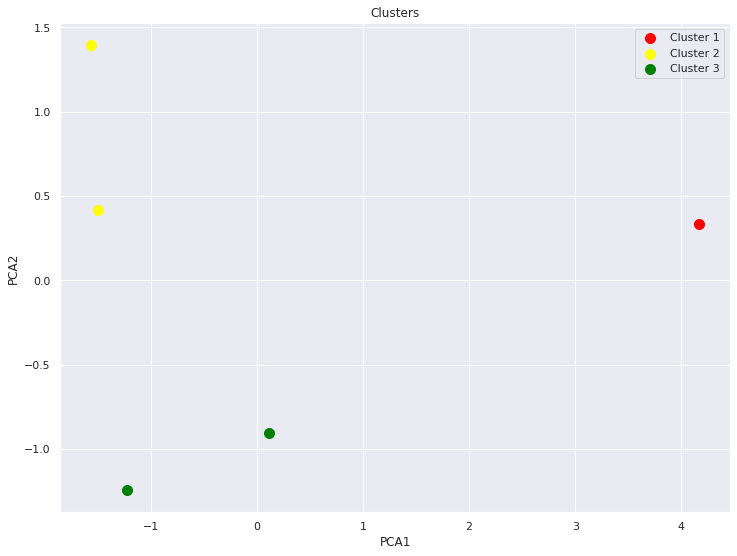

time: 399 ms


In [ ]:
#3 clusters
hc = KMeans(n_clusters = 3, random_state=42)
y_hc = hc.fit_predict(data)
plt.figure(figsize = (12,9))
plt.scatter(reduced_data2[y_hc == 0, 0], reduced_data2[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(reduced_data2[y_hc == 1, 0], reduced_data2[y_hc == 1, 1], s = 100, c = 'yellow', label = 'Cluster 2')
plt.scatter(reduced_data2[y_hc == 2, 0], reduced_data2[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(reduced_data2[y_hc == 3, 0], reduced_data2[y_hc == 3, 1], s = 100, c = 'purple', label = 'Cluster 3')
#plt.scatter(reduced_data2[y_hc == 4, 0], reduced_data2[y_hc == 4, 1], s = 100, c = 'cyan', label = 'Cluster 3')
plt.title('Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

In [ ]:
labels = hc.labels_
print('\033[1m'+'Clustering metrics - unsupervised'+'\033[0m')
print('Silhouette: ',metrics.silhouette_score(data, labels, metric='euclidean'))
print('Davies-Bouldin Index: ',metrics.davies_bouldin_score(data, labels))
print('Calinski-Harabasz Index: ',metrics.calinski_harabaz_score(data, labels))

Clustering metrics - unsupervised
Silhouette:  0.2597060426257588
Davies-Bouldin Index:  0.5786431610044368
Calinski-Harabasz Index:  8.5391152681391
time: 14.4 ms


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)


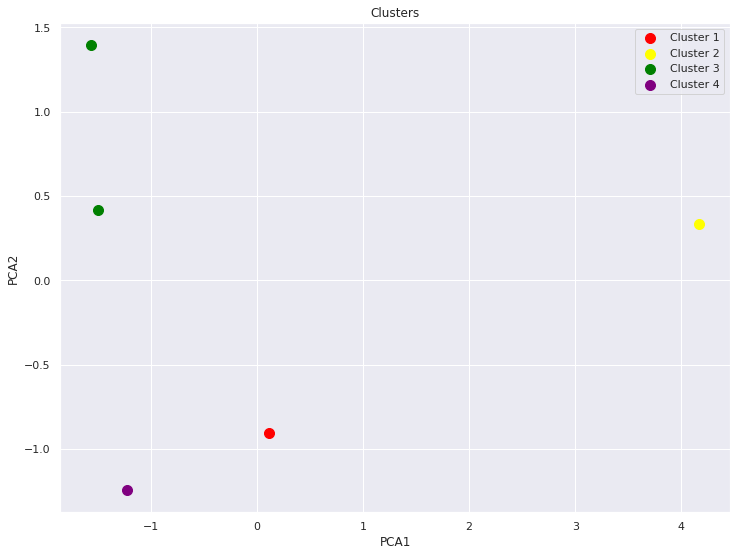

time: 393 ms


In [ ]:
#4 clusters
hc = KMeans(n_clusters = 4, random_state=42)
y_hc = hc.fit_predict(data)
plt.figure(figsize = (12,9))
plt.scatter(reduced_data2[y_hc == 0, 0], reduced_data2[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(reduced_data2[y_hc == 1, 0], reduced_data2[y_hc == 1, 1], s = 100, c = 'yellow', label = 'Cluster 2')
plt.scatter(reduced_data2[y_hc == 2, 0], reduced_data2[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(reduced_data2[y_hc == 3, 0], reduced_data2[y_hc == 3, 1], s = 100, c = 'purple', label = 'Cluster 4')
#plt.scatter(reduced_data2[y_hc == 4, 0], reduced_data2[y_hc == 4, 1], s = 100, c = 'cyan', label = 'Cluster 3')
plt.title('Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

In [ ]:
labels = hc.labels_
print('\033[1m'+'Clustering metrics - unsupervised'+'\033[0m')
print('Silhouette: ',metrics.silhouette_score(data, labels, metric='euclidean'))
print('Davies-Bouldin Index: ',metrics.davies_bouldin_score(data, labels))
print('Calinski-Harabasz Index: ',metrics.calinski_harabaz_score(data, labels))

Clustering metrics - unsupervised
Silhouette:  0.20408288566025198
Davies-Bouldin Index:  0.18903571744471423
Calinski-Harabasz Index:  17.401588369935393
time: 14.9 ms


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)


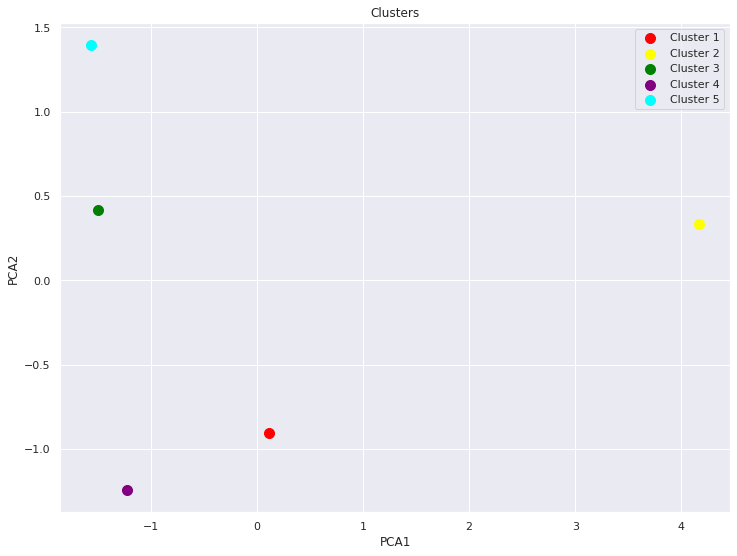

time: 402 ms


In [ ]:
#5 clusters
hc = KMeans(n_clusters = 5, random_state=42)
y_hc = hc.fit_predict(data)
plt.figure(figsize = (12,9))
plt.scatter(reduced_data2[y_hc == 0, 0], reduced_data2[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(reduced_data2[y_hc == 1, 0], reduced_data2[y_hc == 1, 1], s = 100, c = 'yellow', label = 'Cluster 2')
plt.scatter(reduced_data2[y_hc == 2, 0], reduced_data2[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(reduced_data2[y_hc == 3, 0], reduced_data2[y_hc == 3, 1], s = 100, c = 'purple', label = 'Cluster 4')
plt.scatter(reduced_data2[y_hc == 4, 0], reduced_data2[y_hc == 4, 1], s = 100, c = 'cyan', label = 'Cluster 5')
plt.title('Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

In [ ]:
labels = hc.labels_
#print('\033[1m'+'Clustering metrics - unsupervised'+'\033[0m')
#print('Silhouette: ',metrics.silhouette_score(data, labels, metric='euclidean'))
#print('Davies-Bouldin Index: ',metrics.davies_bouldin_score(data, labels))
#print('Calinski-Harabasz Index: ',metrics.calinski_harabaz_score(data, labels))

time: 1.42 ms


In [ ]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

time: 49.1 ms


In [ ]:
countries = pd.DataFrame(world['name'])

time: 3.36 ms


In [ ]:
countries.to_csv('countries.csv')

time: 101 ms


### Alternative visualization of clusters

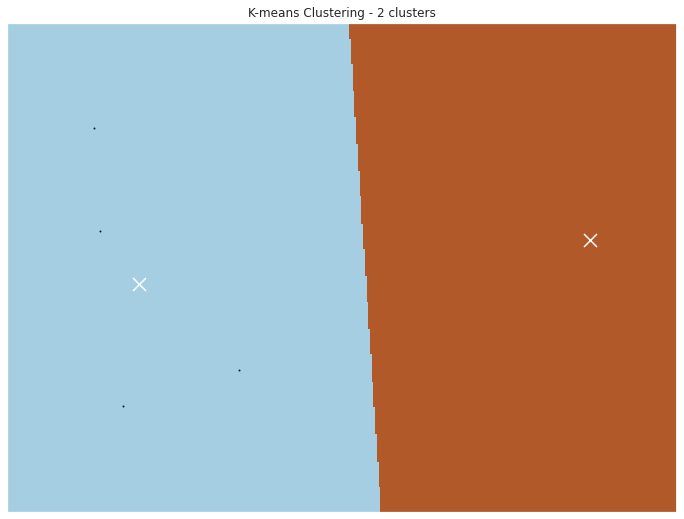

time: 366 ms


In [ ]:
kmeans = KMeans(init='k-means++', n_clusters=2, n_init=100)
kmeans.fit(reduced_data2)
h = .02 

x_min, x_max = reduced_data2[:, 0].min() - 1, reduced_data2[:, 0].max() + 1
y_min, y_max = reduced_data2[:, 1].min() - 1, reduced_data2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(figsize = (12,9))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data2[:, 0], reduced_data2[:, 1], 'k.', markersize=2)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)

plt.title('K-means Clustering - 2 clusters')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

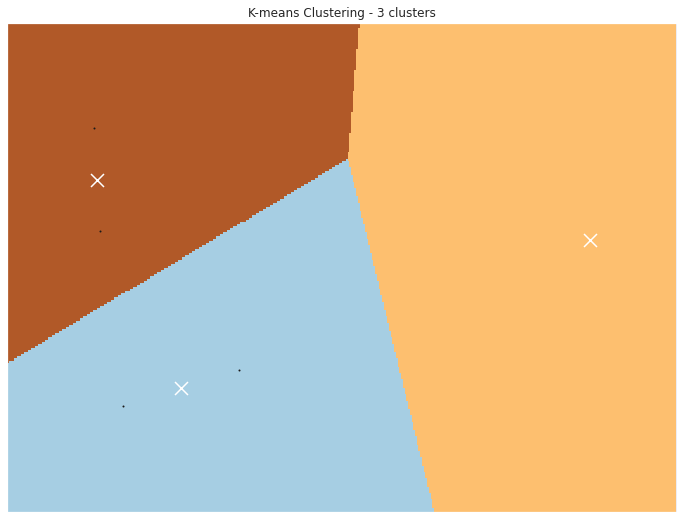

time: 395 ms


In [ ]:
kmeans = KMeans(init='k-means++', n_clusters=3, n_init=100)
kmeans.fit(reduced_data2)
h = .02 

x_min, x_max = reduced_data2[:, 0].min() - 1, reduced_data2[:, 0].max() + 1
y_min, y_max = reduced_data2[:, 1].min() - 1, reduced_data2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(figsize = (12,9))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data2[:, 0], reduced_data2[:, 1], 'k.', markersize=2)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)

plt.title('K-means Clustering - 3 clusters')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

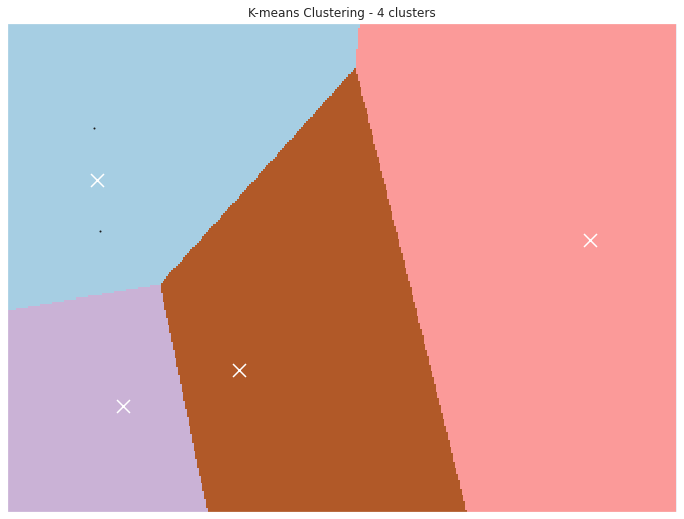

time: 416 ms


In [ ]:
kmeans = KMeans(init='k-means++', n_clusters=4, n_init=100)
kmeans.fit(reduced_data2)
h = .02 

x_min, x_max = reduced_data2[:, 0].min() - 1, reduced_data2[:, 0].max() + 1
y_min, y_max = reduced_data2[:, 1].min() - 1, reduced_data2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(figsize = (12,9))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data2[:, 0], reduced_data2[:, 1], 'k.', markersize=2)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)

plt.title('K-means Clustering - 4 clusters')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

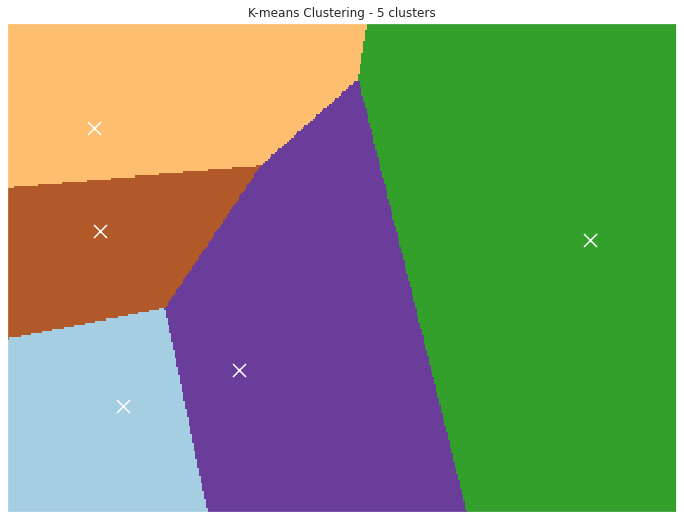

time: 410 ms


In [ ]:
kmeans = KMeans(init='k-means++', n_clusters=5, n_init=100)
kmeans.fit(reduced_data2)
h = .02 

x_min, x_max = reduced_data2[:, 0].min() - 1, reduced_data2[:, 0].max() + 1
y_min, y_max = reduced_data2[:, 1].min() - 1, reduced_data2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(figsize = (12,9))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data2[:, 0], reduced_data2[:, 1], 'k.', markersize=2)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)

plt.title('K-means Clustering - 5 clusters')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

## Map generation

# begin looping

In [ ]:
#X clusters
hc = KMeans(n_clusters = 4, random_state=42)
y_hc = hc.fit_predict(data)
y_hc.shape

predictions = pd.Series(y_hc, index=df.index)
df['predict'] = pd.Series(predictions)
df['predict'].to_csv('predictions.csv')

time: 33.6 ms


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  import sys


# manual change countries.csv with values from predictions.csv and rename both

In [ ]:
countries = pd.read_csv('countries.csv')

time: 9.16 ms


# end looping

In [ ]:
world['predictions'] = countries['predictions']

time: 6.13 ms


In [ ]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,predictions
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",NaN
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",3.0


time: 35.5 ms


Text(0.5, 1.0, '2 clusters')

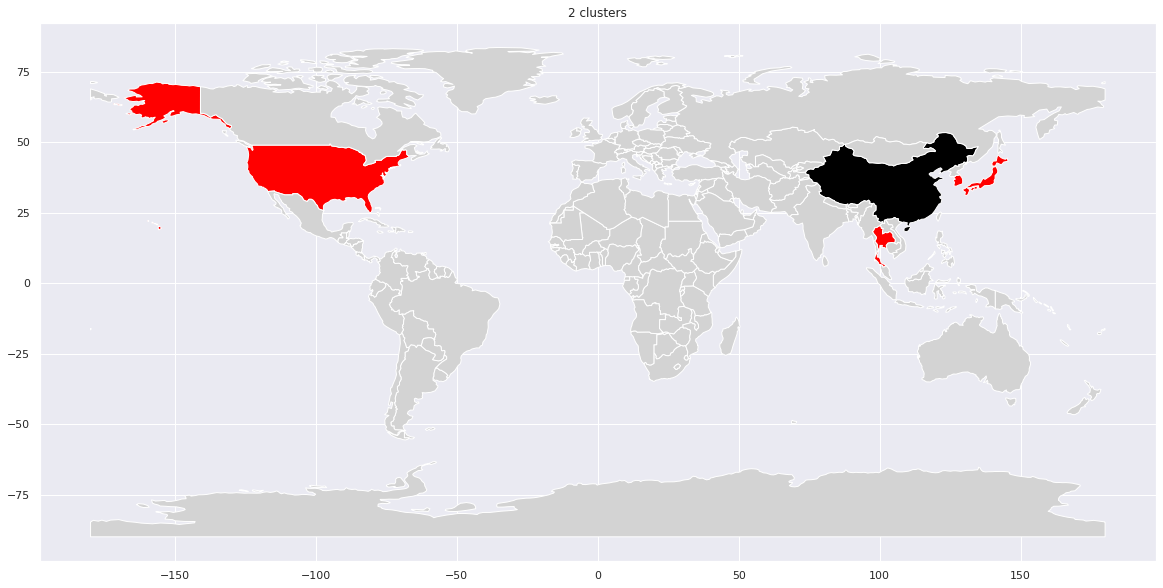

time: 663 ms


In [ ]:
ax = world.plot(column='predictions', cmap='flag', figsize=(20,10), missing_kwds={'color': 'lightgrey'})
ax.set_title("2 clusters")

Text(0.5, 1.0, '3 clusters')

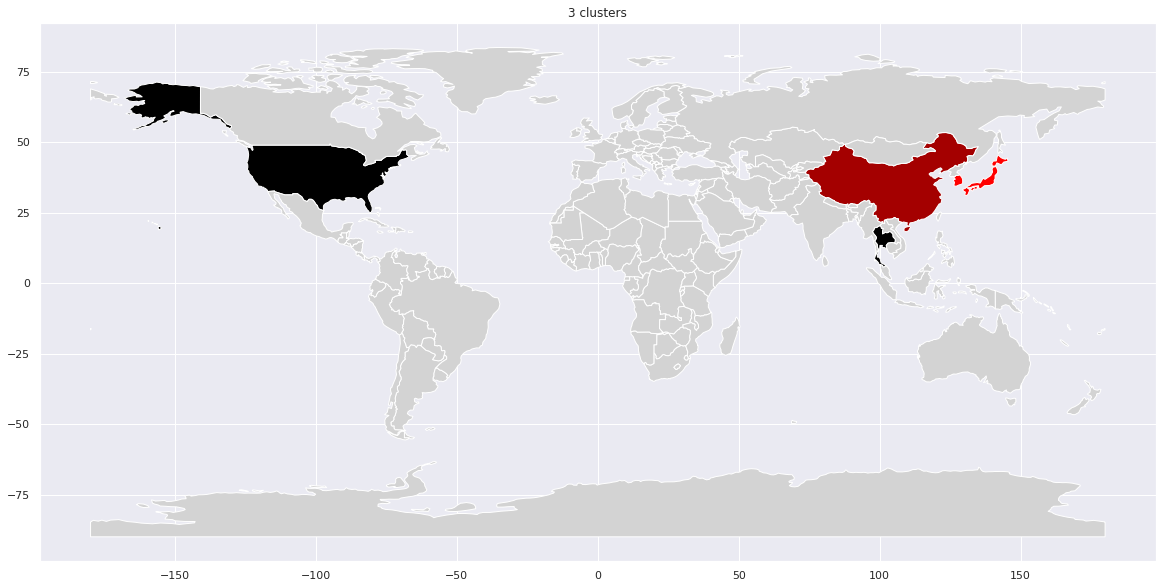

time: 663 ms


In [ ]:
ax = world.plot(column='predictions', cmap='flag', figsize=(20,10), missing_kwds={'color': 'lightgrey'})
ax.set_title("3 clusters")

Text(0.5, 1.0, '4 clusters')

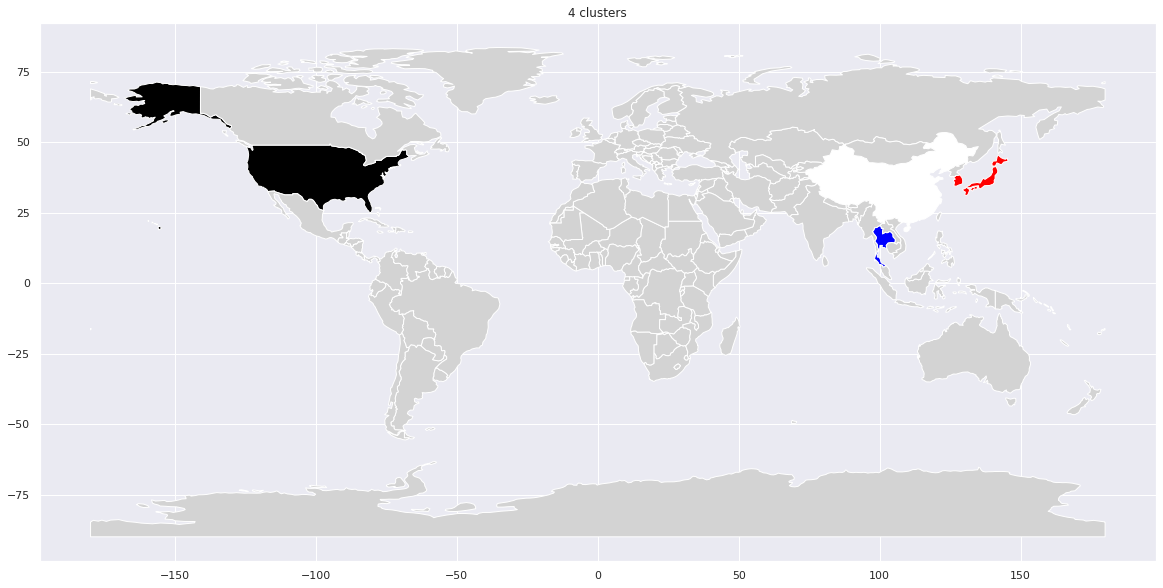

time: 648 ms


In [ ]:
ax = world.plot(column='predictions', cmap='flag', figsize=(20,10), missing_kwds={'color': 'lightgrey'})
ax.set_title("4 clusters")